In [38]:
%use

Subkernel,Kernel Name,Language,Language Module,Interpreter
Julia,julia-1.8,julia,sos_julia,/opt/julia-1.8.5/bin/julia
Markdown,markdown,markdown,,/opt/conda/bin/python
Octave,octave,octave,sos_matlab,python
Python3,python3,python,sos_python,/opt/conda/bin/python
R,ir,R,sos_r,R
SoS,sos,sos,,/opt/conda/bin/python


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


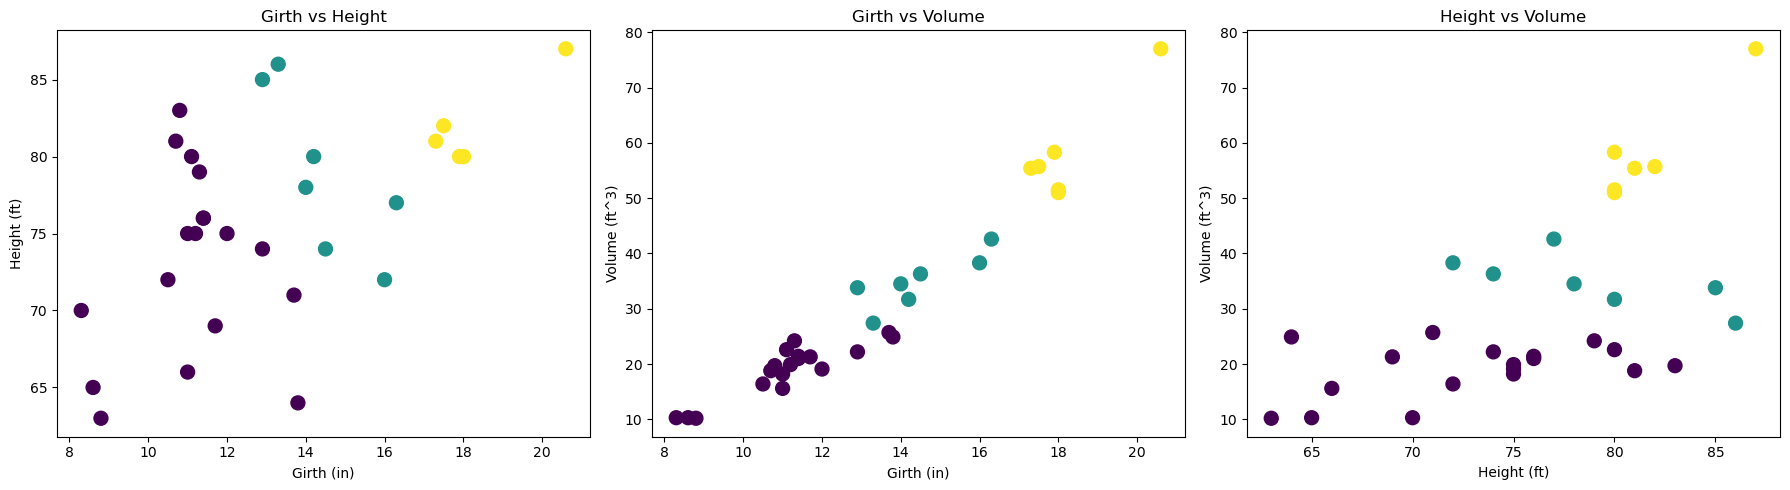

In [39]:
%use Python3

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Read data from CSV file
df = pd.read_csv("trees.csv")

# Features for clustering
features = df[["Girth.in.", "Height.ft.", "Volume.ft3."]]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(features)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)

# Girth vs Height
axes[0].scatter(df["Girth.in."], df["Height.ft."], c=df["Cluster"], cmap="viridis", s=100)
axes[0].set_title("Girth vs Height")
axes[0].set_xlabel("Girth (in)")
axes[0].set_ylabel("Height (ft)")

# Girth vs Volume
axes[1].scatter(df["Girth.in."], df["Volume.ft3."], c=df["Cluster"], cmap="viridis", s=100)
axes[1].set_title("Girth vs Volume")
axes[1].set_xlabel("Girth (in)")
axes[1].set_ylabel("Volume (ft^3)")

# Height vs Volume
axes[2].scatter(df["Height.ft."], df["Volume.ft3."], c=df["Cluster"], cmap="viridis", s=100)
axes[2].set_title("Height vs Volume")
axes[2].set_xlabel("Height (ft)")
axes[2].set_ylabel("Volume (ft^3)")

plt.tight_layout()
plt.show()

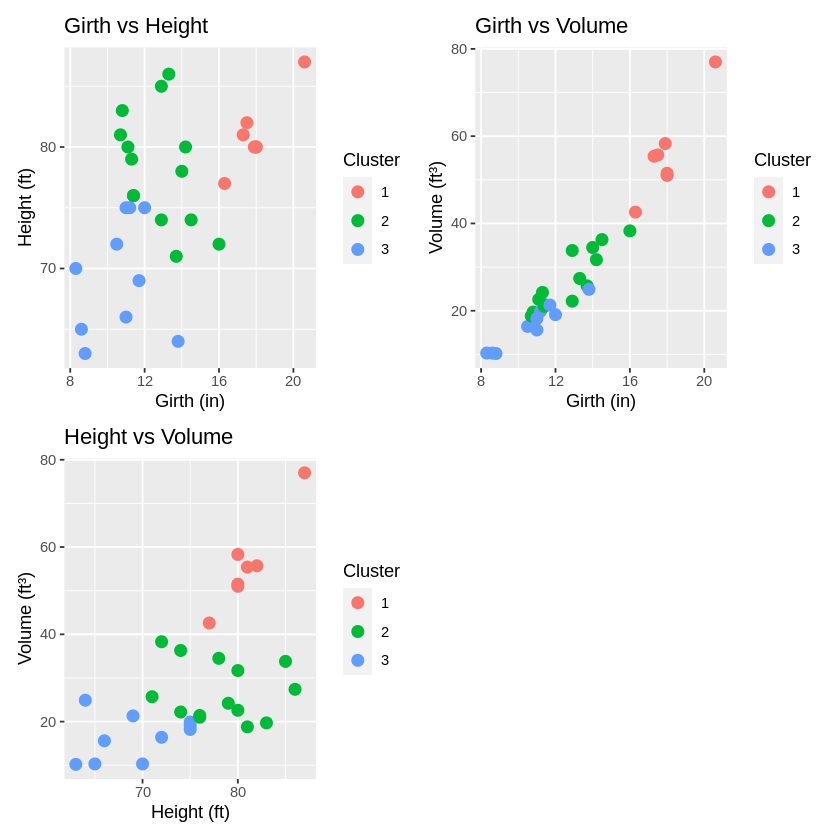

In [40]:
%use R

# Load necessary libraries
library(ggplot2)
library(patchwork)

# Read data from CSV file
df <- read.csv("trees.csv")

# Extract features for clustering
features <- df[, c("Girth.in.", "Height.ft.", "Volume.ft3.")]

# Apply KMeans clustering
set.seed(42) # Ensure reproducibility
clusters <- kmeans(features, centers = 3)

# Add cluster assignments back to the data frame
df$Cluster <- as.factor(clusters$cluster)

# Plot Girth vs Height
plot1 <- ggplot(df, aes(x = Girth.in., y = Height.ft., color = Cluster)) +
  geom_point(size = 3) +
  ggtitle("Girth vs Height") +
  xlab("Girth (in)") +
  ylab("Height (ft)")

# Plot Girth vs Volume
plot2 <- ggplot(df, aes(x = Girth.in., y = Volume.ft3., color = Cluster)) +
  geom_point(size = 3) +
  ggtitle("Girth vs Volume") +
  xlab("Girth (in)") +
  ylab("Volume (ft³)")

# Plot Height vs Volume
plot3 <- ggplot(df, aes(x = Height.ft., y = Volume.ft3., color = Cluster)) +
  geom_point(size = 3) +
  ggtitle("Height vs Volume") +
  xlab("Height (ft)") +
  ylab("Volume (ft³)")

# Combine the plots in one row
combined_plot <- plot1 + plot2 + plot3 + plot_layout(nrow = 2)

# Display the combined plot
print(combined_plot)

In [41]:
%use Octave

% Load the data from the CSV file
data = csvread('trees.csv', 1, 0);  % Skip header row

% Calculate statistics for each column (Index, Girth, Height, Volume)
girth = data(:, 2);  % Girth (inches)
height = data(:, 3);  % Height (feet)
volume = data(:, 4);  % Volume (cubic feet)

% Mean of each column
mean_girth = mean(girth);
mean_height = mean(height);
mean_volume = mean(volume);

% Median of each column
median_girth = median(girth);
median_height = median(height);
median_volume = median(volume);

% Standard deviation
std_girth = std(girth);
std_height = std(height);
std_volume = std(volume);

% Min and max values
min_girth = min(girth);
max_girth = max(girth);
min_height = min(height);
max_height = max(height);
min_volume = min(volume);
max_volume = max(volume);

% Display the results
disp("Girth: Mean, Median, Std Dev, Min, Max");
disp([mean_girth, median_girth, std_girth, min_girth, max_girth]);

disp("Height: Mean, Median, Std Dev, Min, Max");
disp([mean_height, median_height, std_height, min_height, max_height]);

disp("Volume: Mean, Median, Std Dev, Min, Max");
disp([mean_volume, median_volume, std_volume, min_volume, max_volume]);

Girth: Mean, Median, Std Dev, Min, Max
   13.2484   12.9000    3.1381    8.3000   20.6000
Height: Mean, Median, Std Dev, Min, Max
   76.0000   76.0000    6.3718   63.0000   87.0000
Volume: Mean, Median, Std Dev, Min, Max
   30.171   24.200   16.438   10.200   77.000
